In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv('Repo/marathon_results_2017.csv')

In [73]:
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [74]:
df.shape

(26410, 25)

How many null values?

In [75]:
df.isnull().sum()

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             3595
Country              0
Citizen          25156
Unnamed: 9       26319
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [76]:
df['Unnamed: 9'].value_counts()

VI    54
MI    37
Name: Unnamed: 9, dtype: int64

In [77]:
df['Proj Time'].value_counts()

-    26410
Name: Proj Time, dtype: int64

In [78]:
df.drop(['Unnamed: 0', 'Proj Time'], axis=1, inplace=True)

In [79]:
df['Citizen'].value_counts()[:10]

GBR    141
CAN    131
JPN    115
CHN     78
USA     74
IRL     72
MEX     69
FRA     50
GER     46
AUS     35
Name: Citizen, dtype: int64

In [82]:
df.loc[df['Citizen'].isnull() == False, ['Name', 'City', 'State', 'Country', 'Citizen']][:10]

,Name,City,State,Country,Citizen
16,"Kisri, Rachid",Briarcliff Manor,NY,USA,MAR
18,"Ndhlovu, Pardon",Vilas,NC,USA,ZIM
21,"Chipsiya, Christopher K.",Zacatecas,NaN,MEX,KEN
49,"Varela, Jonnathan",Spring,TX,USA,CRC
60,"O'Leary, Paddy C",San Francisco,CA,USA,IRL
66,"Fallas Navarro, Juan R.",Shasta Lake,CA,USA,CRC
73,"Trimaille, Johan",Quebec,QC,CAN,FRA
177,"Tongue, Patrick K.",Zeiningen,NaN,SUI,AUS
182,"Battoo, Christopher",Boston,MA,USA,TRI
206,"Finlay, Gavin",Durham,NC,USA,IRL


In [83]:
df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K',
       '40K', 'Pace', 'Official Time', 'Overall', 'Gender', 'Division'],
      dtype='object')

In [84]:
cols_to_transform = ['5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace', 'Official Time']

In [85]:
for c in cols_to_transform:
    df[c] = df[c].apply(pd.to_timedelta)

In [86]:
sns.set_style('darkgrid')

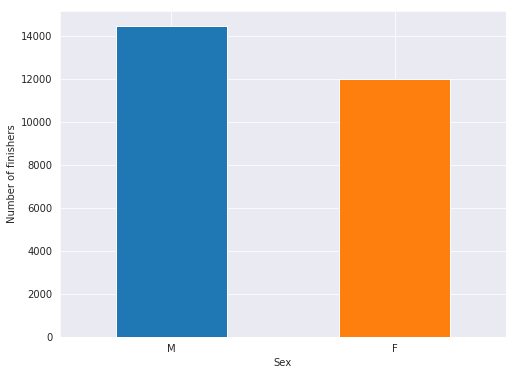

In [88]:
ax = df['M/F'].value_counts().plot(kind='bar', rot=360, figsize=(8, 6))
ax.set_xlabel('Sex')
ax.set_ylabel('Number of finishers');

In [16]:
df['Age'].describe()

count    26410.000000
mean        42.587732
std         11.419467
min         18.000000
25%         34.000000
50%         43.000000
75%         51.000000
max         84.000000
Name: Age, dtype: float64

In [17]:
df['Age'].mean()

42.587731919727375

In [18]:
df['Age'].median()

43.0

In [19]:
df['Age'].std()

11.419467009634293

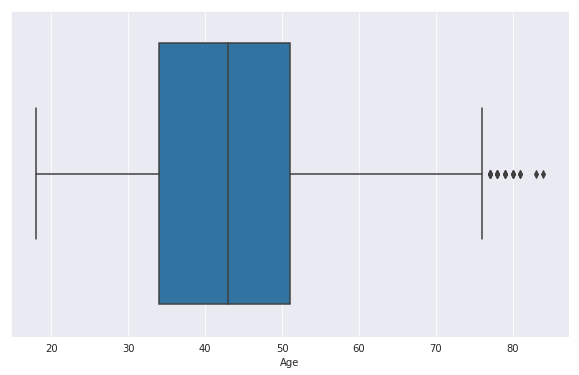

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Age'], ax=ax);

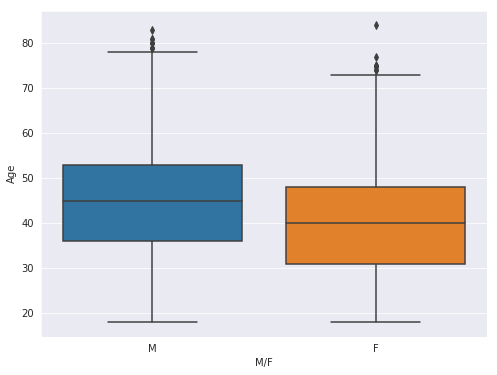

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='M/F', y='Age', data=df, ax=ax);

In [91]:
df['Age'].value_counts()

45    1127
46     976
40     926
47     843
50     815
41     801
35     800
48     784
42     758
36     733
39     712
43     706
37     687
49     686
55     682
38     670
51     658
44     651
52     638
29     636
30     629
33     591
28     590
31     583
53     573
27     571
32     563
26     557
34     540
56     504
      ... 
58     345
23     307
59     284
62     271
22     210
65     187
63     157
21     147
66     137
64     117
67     100
20      83
70      78
68      67
69      47
19      43
71      25
73      22
18      20
72      19
74      17
75      15
76      10
77       5
78       4
80       3
79       3
81       2
83       1
84       1
Name: Age, Length: 66, dtype: int64

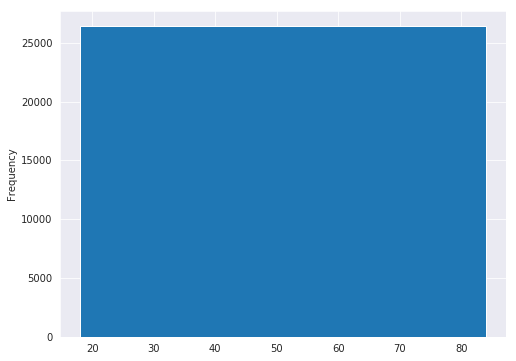

In [92]:
df['Age'].plot(kind='hist', rot=360, figsize=(8, 6), bins=1);

/home/martinpella/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


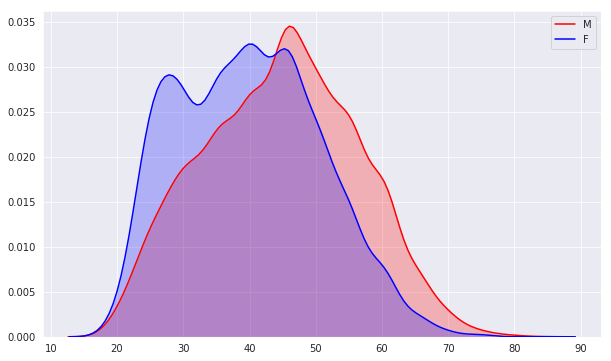

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
p1=sns.kdeplot(df.loc[df['M/F'] == 'M', 'Age'], shade=True, color="r", ax=ax, label='M')
p1=sns.kdeplot(df.loc[df['M/F'] == 'F', 'Age'], shade=True, color="b", ax=ax, label='F')

In [24]:
df['Country'].value_counts()[:10]

USA    20945
CAN     1870
GBR      425
MEX      285
CHN      242
GER      226
BRA      205
AUS      191
JPN      170
ITA      165
Name: Country, dtype: int64

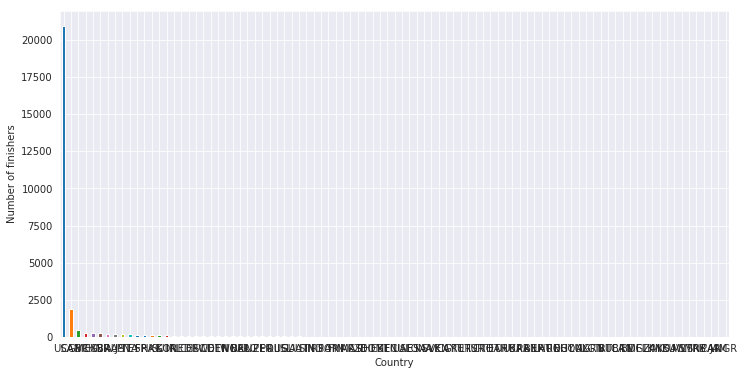

In [25]:
ax = df['Country'].value_counts().plot(kind='bar', rot=360, figsize=(12, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

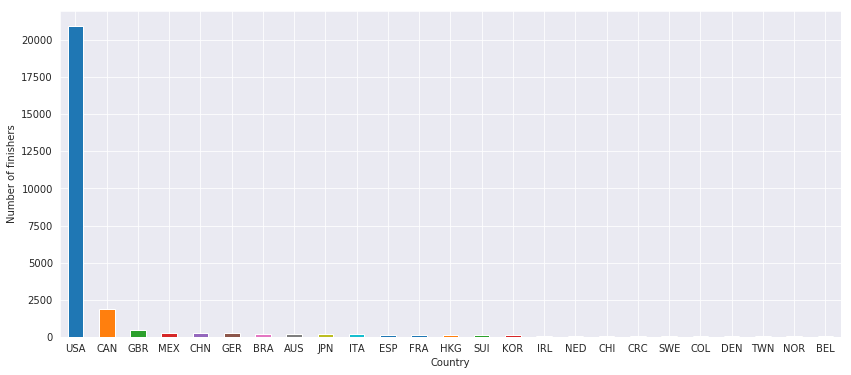

In [26]:
ax = df['Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

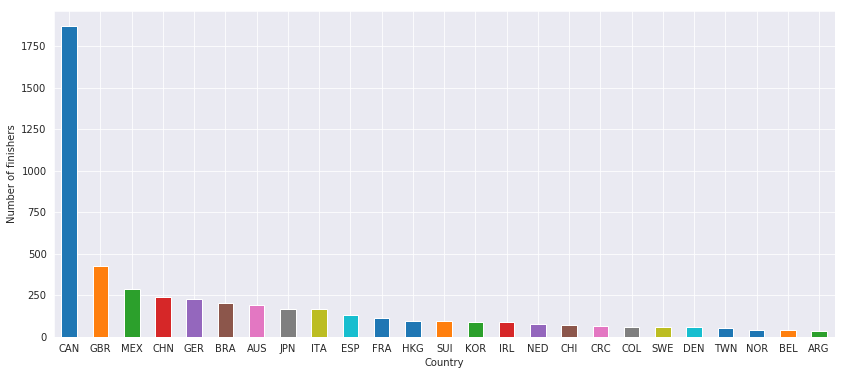

In [27]:
ax = df.loc[df['Country'] != 'USA', 'Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

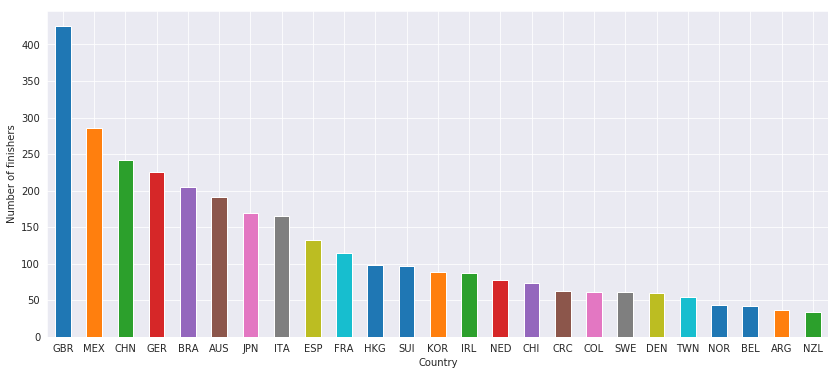

In [28]:
ax = df.loc[(df['Country'] != 'USA') & (df['Country'] != 'CAN'), 'Country'].value_counts()[:25].plot(kind='bar', rot=360, figsize=(14, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Number of finishers');

In [29]:
df['Half_2'] = df['Official Time'] - df['Half']

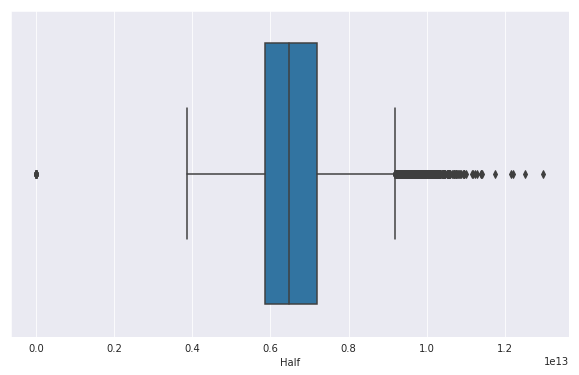

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['Half'], ax=ax);

In [31]:
len(df.loc[df['Half'] == '00:00:00'])

17

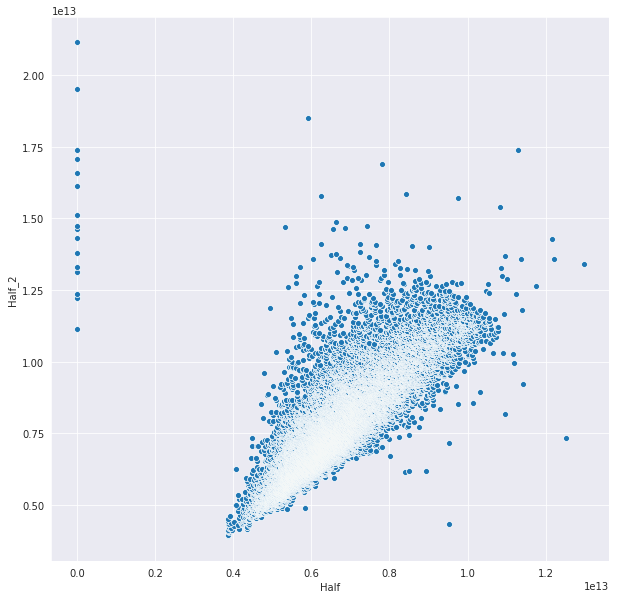

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='Half', y='Half_2', data=df, ax=ax);

In [69]:
tmp_df = pd.DataFrame({'Half': [0, 1, 1.5e13],
                       'Half_2': [0, 1, 1.5e13]})

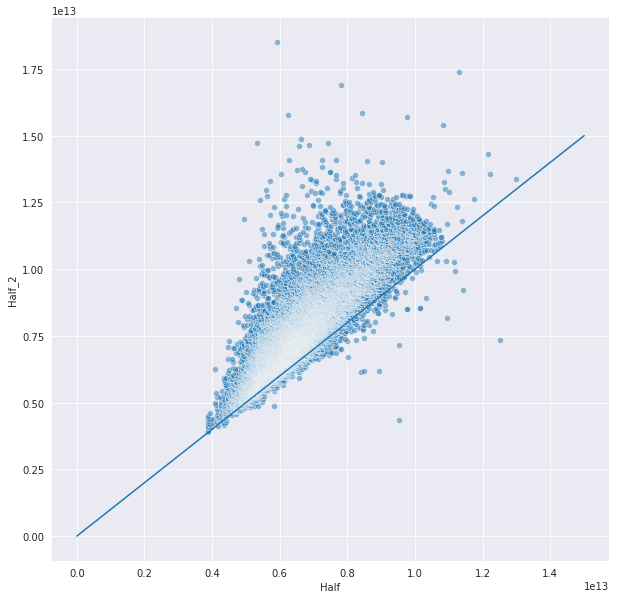

In [70]:
fig, ax = plt.subplots(figsize=(10, 10))
p = sns.scatterplot(x='Half', y='Half_2', data=df.loc[df['Half'] > '0'], ax=ax, alpha=0.5);
p = sns.lineplot(x='Half', y='Half_2', data=tmp_df, ax=ax, )